The purpose of this notebook is to take the already parsed and classified list of HDFS paths and generate various useful reports and derivatives to power downstream processes.

First we set up the parameters that specify where the results will go:

In [16]:
# This cell is tagged `parameters` (use View > Cell Toolbar > Tags to modify)
# this allows these values to be overridden if the notebook is run via papermill
parsed_files_csv = '/mnt/gluster/ingest/task-state/hdfs/current/current-hdfs-parsed-paths.csv'
#parsed_files_csv = 'test/hdfs-parsed-paths.csv'
total_file_size_by_stream = 'test/total-file-size-by-stream.csv'
total_file_count_by_stream = 'test/total-file-count-by-stream.csv'
npld_total_file_size_by_stream_per_year = 'test/npld-total-file-size-by-stream-per-year.csv'
npld_total_file_size_by_stream_per_month = 'test/npld-total-file-size-by-stream-per-month.csv'
npld_total_file_size_by_stream_totals = 'test/npld-total-file-size-by-stream-totals.csv'

Then we load the CSV that contains the parsed paths from HDFS

In [17]:
import pandas as pd

# Enable inline plots
%matplotlib inline

# Do not truncate file path display:
pd.set_option('display.max_colwidth', -1)

# Show more rows
pd.options.display.max_rows = 1000

# Load the data:
df = pd.read_csv(parsed_files_csv)

# Interpret modified_at and timestamp as a datetimes:
df.timestamp = pd.to_datetime(df.timestamp)

# Ignore the to-be-deleted data:
df = df.loc[df['kind'] != 'to-be-deleted']

# Show us the data:
df.head()

,recognised,collection,stream,job,kind,permissions,number_of_replicas,user_id,group_id,file_size,modified_at,timestamp,file_path,file_name,file_ext
0,False,None,None,None,unknown,-rw-r--r--,3,hdfs,supergroup,206979,2016-05-24T10:55:00,2016-05-24 10:55:00,/0_original/fc/crawler03/heritrix/output/images/1365759028.jpg,1365759028.jpg,.jpg
1,False,None,None,None,unknown,-rw-r--r--,3,hdfs,supergroup,259004,2016-05-24T10:55:00,2016-05-24 10:55:00,/0_original/fc/crawler03/heritrix/output/images/1365759053.jpg,1365759053.jpg,.jpg
2,False,None,None,None,unknown,-rw-r--r--,3,hdfs,supergroup,137950,2016-05-24T10:56:00,2016-05-24 10:56:00,/0_original/fc/crawler03/heritrix/output/images/1365759065.jpg,1365759065.jpg,.jpg
3,False,None,None,None,unknown,-rw-r--r--,3,hdfs,supergroup,157173,2016-05-24T10:56:00,2016-05-24 10:56:00,/0_original/fc/crawler03/heritrix/output/images/1365759068.jpg,1365759068.jpg,.jpg
4,False,None,None,None,unknown,-rw-r--r--,3,hdfs,supergroup,121905,2016-05-24T10:56:00,2016-05-24 10:56:00,/0_original/fc/crawler03/heritrix/output/images/1365759074.jpg,1365759074.jpg,.jpg


Add a utility for pretty-printing the bytes counts etc.

In [18]:
from data_formatters import humanbytes

Start with per-collection reports, both in file size totals and file counts

In [19]:
# Write out the per-collection report:
with open(total_file_size_by_stream, 'w') as f_out:
    # Pandas query:
    df2 = df.loc[df.stream != 'None'].groupby([df.collection, df.stream, df.timestamp.dt.year, df.kind]).file_size.sum().unstack()
    # Output the result as CSV:
    df2.to_csv(f_out,float_format="%.0f")
 
# Now the same but as file counts:
with open(total_file_count_by_stream, 'w') as f_out:
    # Pandas query:
    df2 = df.loc[df.stream != 'None'].groupby([df.collection, df.stream, df.timestamp.dt.year, df.kind]).file_size.count().unstack()
    # Output the result as CSV:
    df2.to_csv(f_out,float_format="%.0f")

df2

kind                                cdx  crawl-logs       dlx     logs  \
collection stream    timestamp                                           
npld       domain    2013      NaN       9.0        NaN        4.0       
                     2014      NaN       109.0      NaN        59.0      
                     2015      NaN       271.0      NaN        817.0     
                     2016      NaN       331.0      NaN        1990.0    
                     2017      NaN       239.0      NaN        1434.0    
           frequent  2013      NaN       19.0       NaN        1092.0    
                     2014      NaN       6693.0     NaN        41493.0   
                     2015      NaN       3008.0     NaN        18673.0   
                     2016      NaN       829.0      NaN        5188.0    
                     2017      NaN       7631.0     NaN        44937.0   
                     2018      NaN       5733.0     NaN        33966.0   
                     2019      NaN       2059.0     NaN        12133.0   
selective  selective 2010      NaN       50.0        5076.0    42.0      
                     2011      NaN       30896.0     141666.0  30718.0   
                     2012       14581.0  11337.0     53229.0   12150.0   
                     2013       49866.0  9853.0      49891.0   11370.0   
                     2014       29058.0  5065.0      29067.0   6108.0    
                     2015       27650.0  7945.0      29820.0   9537.0    
                     2016       5227.0   1372.0      4946.0    1931.0    

kind                            unknown  viral     warcs  warcs-invalid  
collection stream    timestamp                                           
npld       domain    2013      NaN       10.0   33102.0  NaN             
                     2014      NaN       233.0  61196.0  NaN             
                     2015      NaN       202.0  74237.0  NaN             
                     2016      NaN       238.0  102141.0 NaN             
                     2017      NaN       145.0  76079.0  NaN             
           frequent  2013      NaN       17.0   6581.0   NaN             
                     2014      NaN       11.0   15787.0  NaN             
                     2015      NaN       36.0   18635.0  NaN             
                     2016      NaN       127.0  27212.0   19.0           
                     2017      NaN       345.0  40397.0   137.0          
                     2018      NaN       707.0  67562.0   13.0           
                     2019      NaN       658.0  41260.0  NaN             
selective  selective 2010       5032.0  NaN     5078.0   NaN             
                     2011       65920.0 NaN     121927.0  33.0           
                     2012       22681.0 NaN     51356.0  NaN             
                     2013       20212.0 NaN     49994.0  NaN             
                     2014       10139.0 NaN     29058.0  NaN             
                     2015       16147.0 NaN     30081.0  NaN             
                     2016       2780.0  NaN     5224.0   NaN

Now, filter the data down to focus on npld content

In [20]:
# Focus on NPLD:
np = df.loc[df.collection == 'npld'].loc[df.kind.isin(['warcs', 'crawl-logs', 'viral'])].reset_index()
np.head()

,index,recognised,collection,stream,job,kind,permissions,number_of_replicas,user_id,group_id,file_size,modified_at,timestamp,file_path,file_name,file_ext
0,1726884,True,npld,frequent,annual,crawl-logs,-rw-r--r--,3,hdfs,supergroup,0,2017-04-06T07:04:00,2015-04-04 10:06:06,/heritrix/output/logs/annual/20150404100606/crawl.log,crawl.log,.log
1,1726885,True,npld,frequent,annual,crawl-logs,-rw-r--r--,3,hdfs,supergroup,78431785,2017-04-06T06:59:00,2015-04-04 10:06:06,/heritrix/output/logs/annual/20150404100606/crawl.log.cp00001-20150406024606.gz,crawl.log.cp00001-20150406024606.gz,.log.cp00001-20150406024606.gz
2,1726886,True,npld,frequent,annual,crawl-logs,-rw-r--r--,3,hdfs,supergroup,12174885,2017-04-06T07:04:00,2015-04-04 10:06:06,/heritrix/output/logs/annual/20150404100606/crawl.log.cp00002-20150407192606.gz,crawl.log.cp00002-20150407192606.gz,.log.cp00002-20150407192606.gz
3,1726887,True,npld,frequent,annual,crawl-logs,-rw-r--r--,3,hdfs,supergroup,8419772,2017-04-06T07:08:00,2015-04-04 10:06:06,/heritrix/output/logs/annual/20150404100606/crawl.log.cp00003-20150409120607.gz,crawl.log.cp00003-20150409120607.gz,.log.cp00003-20150409120607.gz
4,1726888,True,npld,frequent,annual,crawl-logs,-rw-r--r--,3,hdfs,supergroup,5833240,2017-04-06T06:53:00,2015-04-04 10:06:06,/heritrix/output/logs/annual/20150404100606/crawl.log.cp00004-20150411044607.gz,crawl.log.cp00004-20150411044607.gz,.log.cp00004-20150411044607.gz


And now we can generate various reports across that subset...

In [21]:
# NPLD By year, humanbytes:
with open(npld_total_file_size_by_stream_per_year, 'w') as f_out:
    npsy = np.groupby([np.timestamp.dt.year, np.stream]).file_size.sum().apply(humanbytes).unstack()
    npsy.to_csv(f_out)

npsy

stream,domain,frequent
timestamp,,
2013,34.41 TB,5.25 TB
2014,62.37 TB,9.75 TB
2015,75.72 TB,14.45 TB
2016,104.66 TB,26.96 TB
2017,77.75 TB,26.35 TB
2018,NaN,58.38 TB
2019,NaN,38.74 TB


In [54]:
# NPLD By month:
with open(npld_total_file_size_by_stream_per_month, 'w') as f_out:
    npsm = np.groupby([np.timestamp.dt.to_period('M'), np.stream]).file_size.sum()
    npsm.to_csv(f_out,float_format="%.0f", na_rep=0,index=False)

npsm.reset_index().head(5)

,timestamp,stream,file_size
0,2013-04,domain,21998472987041
1,2013-04,frequent,1233521355297
2,2013-05,domain,10646577013628
3,2013-05,frequent,503687665781
4,2013-06,domain,1760045643819


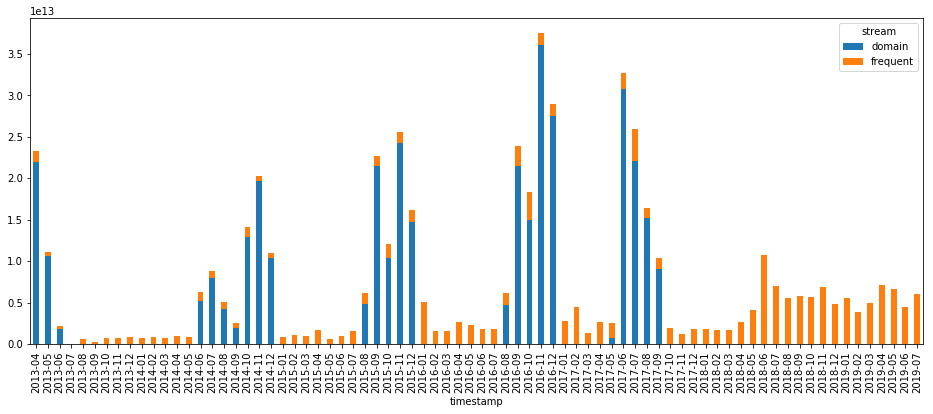

In [57]:
# Don't use reset_index and this works:
npsm.unstack().plot(kind='bar', stacked=True, figsize=(16,6))

In [23]:
# NPLD Total:
with open(npld_total_file_size_by_stream_totals, 'w') as f_out:
    totals = np.groupby(np.stream).file_size.sum().reset_index()
    totals = totals.append({'stream': 'total', 'file_size': totals.file_size.sum()}, ignore_index=True)
    totals.file_size = totals.file_size.apply(humanbytes)
    totals = totals.set_index('stream')
    # Same for counts rather than size totals:
    counts = np.groupby(np.stream).file_size.count().reset_index().rename(columns={'file_size': 'file_count'})
    counts = counts.append({'stream': 'total', 'file_count': counts.file_count.sum()}, ignore_index=True)
    counts = counts.set_index('stream')
    # Join the two together into a single table and output:
    totals = totals.join(counts)
    totals.to_csv(f_out)

totals

,file_size,file_count
stream,,
domain,354.90 TB,348542
frequent,179.88 TB,245307
total,534.78 TB,593849


Generating file lookup tables
-----------------------------------------

For downstream processing, we want to break files down by date.  We can extract and manipulate subsets of this data to do that.

In [24]:
# Focus on LOGS:
logs = df.loc[df.kind == 'crawl-logs']
logs.head()

,recognised,collection,stream,job,kind,permissions,number_of_replicas,user_id,group_id,file_size,modified_at,timestamp,file_path,file_name,file_ext
606176,True,selective,selective,0,crawl-logs,-rw-r--r--,3,rcoram,supergroup,59233,2011-01-27T14:29:00,2011-01-27 14:29:00,/data/100000/26607741/Logs/crawl.log,crawl.log,.log
606185,True,selective,selective,0,crawl-logs,-rw-r--r--,3,rcoram,supergroup,64933,2011-03-07T12:52:00,2011-03-07 12:52:00,/data/100000/31851205/Logs/crawl.log,crawl.log,.log
606191,True,selective,selective,0,crawl-logs,-rw-r--r--,3,rcoram,supergroup,70584,2011-03-14T08:56:00,2011-03-14 08:56:00,/data/100000/53018907/Logs/crawl.log,crawl.log,.log
606197,True,selective,selective,0,crawl-logs,-rw-r--r--,3,rcoram,supergroup,77117,2011-07-06T07:27:00,2011-07-06 07:27:00,/data/100000/57213646/Logs/crawl.log,crawl.log,.log
606203,True,selective,selective,0,crawl-logs,-rw-r--r--,3,rcoram,supergroup,79260,2011-12-17T04:32:00,2011-12-17 04:32:00,/data/100000/60391828/Logs/crawl.log,crawl.log,.log


But for this we only need a subset of the columns...

In [25]:

logs_by_time = logs[['timestamp','collection', 'stream', 'job', 'file_path',]].set_index(['timestamp']).sort_values('timestamp')
logs_by_time


,collection,stream,job,file_path
timestamp,,,,
2010-12-21 10:31:00,selective,selective,9,/data/56197159/56099336/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,6,/data/49741916/49512605/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,7,/data/49315847/49414294/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,1,/data/11534381/36601982/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,9,/data/4325399/31753236/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,8,/data/43188258/44269594/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,3,/data/41713813/42926359/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,2,/data/41713732/41681877/Logs/crawl.log
2010-12-21 10:31:00,selective,selective,5,/data/40632345/41681629/Logs/crawl.log


In [26]:
logs_by_date = logs[['timestamp','collection', 'stream', 'job', 'file_path']].reset_index()
logs_by_date['date'] = logs_by_date.timestamp.dt.date
logs_by_date = logs_by_date.sort_values('timestamp')
logs_by_date = logs_by_date.set_index(['date', 'timestamp'])
logs_by_date.to_csv('log-file-index.csv')
logs_by_date

index collection     stream         job  \
date       timestamp                                                        
2010-12-21 2010-12-21 10:31:00  1318995  selective  selective  9            
           2010-12-21 10:31:00  1293856  selective  selective  6            
           2010-12-21 10:31:00  1280042  selective  selective  7            
           2010-12-21 10:31:00  749081   selective  selective  1            
           2010-12-21 10:31:00  1257494  selective  selective  9            
           2010-12-21 10:31:00  1254337  selective  selective  8            
           2010-12-21 10:31:00  1252670  selective  selective  3            
           2010-12-21 10:31:00  1249787  selective  selective  2            
           2010-12-21 10:31:00  1241164  selective  selective  5            
           2010-12-21 10:31:00  675823   selective  selective  0            
           2010-12-21 10:31:00  1599894  selective  selective  7            
           2010-12-21 10:31:00  606384   selective  selective  6            
           2010-12-21 10:31:00  609141   selective  selective  4            
           2010-12-21 10:31:00  909313   selective  selective  5            
           2010-12-21 10:31:00  1201344  selective  selective  6            
           2010-12-21 10:31:00  827450   selective  selective  0            
           2010-12-21 10:31:00  1155349  selective  selective  5            
           2010-12-21 10:31:00  1180406  selective  selective  3            
           2010-12-21 10:31:00  1138361  selective  selective  6            
           2010-12-21 10:31:00  804213   selective  selective  7            
           2010-12-21 10:31:00  1150112  selective  selective  2            
           2010-12-21 10:31:00  1155329  selective  selective  5            
           2010-12-21 10:31:00  1194162  selective  selective  7            
           2010-12-21 10:31:00  714900   selective  selective  6            
           2010-12-21 10:32:00  752829   selective  selective  6            
           2010-12-21 10:32:00  1311118  selective  selective  0            
           2010-12-21 10:32:00  1203970  selective  selective  2            
           2010-12-21 10:32:00  1171869  selective  selective  6            
           2010-12-21 10:32:00  1263184  selective  selective  8            
           2010-12-21 10:32:00  1141617  selective  selective  1            
           2010-12-21 10:32:00  1309899  selective  selective  6            
           2010-12-21 10:32:00  1305632  selective  selective  8            
           2010-12-21 10:32:00  1250290  selective  selective  6            
           2010-12-21 10:32:00  1239473  selective  selective  1            
           2010-12-21 10:32:00  1235203  selective  selective  2            
           2010-12-21 10:32:00  857675   selective  selective  8            
           2010-12-21 10:32:00  1232868  selective  selective  6            
           2010-12-21 10:32:00  1224880  selective  selective  2            
           2010-12-21 10:32:00  1221925  selective  selective  7            
           2010-12-21 10:32:00  1217384  selective  selective  4            
           2010-12-21 10:32:00  937753   selective  selective  9            
           2010-12-21 10:32:00  1185836  selective  selective  6            
           2010-12-21 10:32:00  1209517  selective  selective  4            
           2010-12-21 10:32:00  685884   selective  selective  9            
           2010-12-21 10:32:00  825089   selective  selective  5            
           2010-12-21 10:32:00  1086210  selective  selective  4            
           2010-12-21 10:32:00  1081834  selective  selective  2            
           2010-12-21 10:32:00  1584273  selective  selective  0            
           2010-12-21 10:32:00  1237207  selective  selective  9            
           2010-12-21 10:32:00  1307237  selective  selective  4            
2011-01-27 2011-01-27 14:29:00

In [27]:
logs_by_date.loc['2019-07-09':'2019-07-10']

index collection    stream    job  \
date       timestamp                                                  
2019-07-09 2019-07-09 11:03:03  1770147  npld       frequent  daily   
           2019-07-09 11:03:03  1770148  npld       frequent  daily   
           2019-07-09 11:03:03  1770149  npld       frequent  daily   
           2019-07-09 11:03:03  1770150  npld       frequent  daily   
           2019-07-09 11:03:03  1770151  npld       frequent  daily   
2019-07-10 2019-07-10 11:02:36  1770178  npld       frequent  daily   
           2019-07-10 11:02:36  1770179  npld       frequent  daily   

                                                                                                  file_path  
date       timestamp                                                                                         
2019-07-09 2019-07-09 11:03:03  /heritrix/output/logs/daily/20190709110303/crawl.log                         
           2019-07-09 11:03:03  /heritrix/output/logs/daily/20190709110303/crawl.log.cp00001-20190709170315  
           2019-07-09 11:03:03  /heritrix/output/logs/daily/20190709110303/crawl.log.cp00002-20190709230317  
           2019-07-09 11:03:03  /heritrix/output/logs/daily/20190709110303/crawl.log.cp00003-20190710050319  
           2019-07-09 11:03:03  /heritrix/output/logs/daily/20190709110303/crawl.log.cp00004-20190710110106  
2019-07-10 2019-07-10 11:02:36  /heritrix/output/logs/daily/20190710110236/crawl.log.cp00001-20190710170247  
           2019-07-10 11:02:36  /heritrix/output/logs/daily/20190710110236/crawl.log.cp00002-20190710230247

In [28]:
logs_by_date.loc['2019-07-10']

index collection    stream    job  \
date       timestamp                                                  
2019-07-10 2019-07-10 11:02:36  1770178  npld       frequent  daily   
           2019-07-10 11:02:36  1770179  npld       frequent  daily   

                                                                                                  file_path  
date       timestamp                                                                                         
2019-07-10 2019-07-10 11:02:36  /heritrix/output/logs/daily/20190710110236/crawl.log.cp00001-20190710170247  
           2019-07-10 11:02:36  /heritrix/output/logs/daily/20190710110236/crawl.log.cp00002-20190710230247

For WARCs

In [29]:
# Focus on WARCs:
warcs = df.loc[df.kind == 'warcs'][['collection', 'stream', 'job', 'timestamp', 'file_path']].reset_index()
# Add a colume that is just the date (YYYY-MM-DD):
warcs['date'] = warcs.timestamp.dt.date
# Sort the data into a useful order:
warcs = warcs.sort_values(['date','collection','stream','job']).set_index(['date', 'index'])
# Save it out for re-use elsewhere:
#warcs.to_csv('warc-file-index.csv')
# Look at a single day as an example:
len(warcs.loc['2019-07-10'])

337

In [30]:
warcs.loc['2019-07-10'].head(10)

collection    stream    job               timestamp  \
date       index                                                         
2019-07-10 2085154  npld       frequent  daily 2019-07-10 02:20:23.940   
           2085155  npld       frequent  daily 2019-07-10 02:30:31.522   
           2085156  npld       frequent  daily 2019-07-10 02:30:31.525   
           2085157  npld       frequent  daily 2019-07-10 04:54:47.773   
           2085158  npld       frequent  daily 2019-07-10 05:03:21.872   
           2085159  npld       frequent  daily 2019-07-10 05:03:21.883   
           2085160  npld       frequent  daily 2019-07-10 05:03:21.884   
           2085161  npld       frequent  daily 2019-07-10 05:03:21.885   
           2085162  npld       frequent  daily 2019-07-10 05:03:21.886   
           2085163  npld       frequent  daily 2019-07-10 09:26:20.388   

                                                                                                                     file_path  
date       index                                                                                                                
2019-07-10 2085154  /heritrix/output/warcs/daily/20190709110303/BL-20190710022023940-00042-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085155  /heritrix/output/warcs/daily/20190709110303/BL-20190710023031522-00043-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085156  /heritrix/output/warcs/daily/20190709110303/BL-20190710023031525-00044-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085157  /heritrix/output/warcs/daily/20190709110303/BL-20190710045447773-00045-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085158  /heritrix/output/warcs/daily/20190709110303/BL-20190710050321872-00046-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085159  /heritrix/output/warcs/daily/20190709110303/BL-20190710050321883-00047-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085160  /heritrix/output/warcs/daily/20190709110303/BL-20190710050321884-00048-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085161  /heritrix/output/warcs/daily/20190709110303/BL-20190710050321885-00049-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085162  /heritrix/output/warcs/daily/20190709110303/BL-20190710050321886-00050-63~ukwa-h3-pulse-daily~8443.warc.gz  
           2085163  /heritrix/output/warcs/daily/20190709110303/BL-20190710092620388-00051-63~ukwa-h3-pulse-daily~8443.warc.gz